In [1]:
from glob import glob
from math import *
import networkx as nx
import matplotlib.pyplot as plt
import re

In [2]:
G = nx.Graph()

colors = ["#e91e63", "#03a9f4", "#4caf50", "#ff5722"]
main_words = []

for f, color in zip(glob("*.csv"), colors):
    main_word = re.search("^(.*?)\.csv", f)[1]
    main_words.append(main_word)
    G.add_node(main_word, color=color)
    
    rows = list(map(str.strip, open(f, "r").readlines()))
    
    s = 0
    for row in rows:
        occurences, word = row.split(",", 1)
        w = int(occurences)
        s += w
    
    for row in rows:
        occurences, word = row.split(",", 1)
        w = int(occurences)
        
        def c():
            if word in main_words:
                return G.node[word]["color"]
            if word in G.nodes:
                return "#795548"

            return color
            
        G.add_node(word, color=c())
        G.add_edge(main_word, word, weight=w, cost=((s - w)/s))
        
        
        G.nodes[main_word]["size"] = G.nodes[main_word].get("size", 10) + w
        G.nodes[word]["size"] = G.nodes[word].get("size", 10) + w

        
    
pos = nx.spring_layout(G, weight="weight", iterations=10000, k=8)

/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


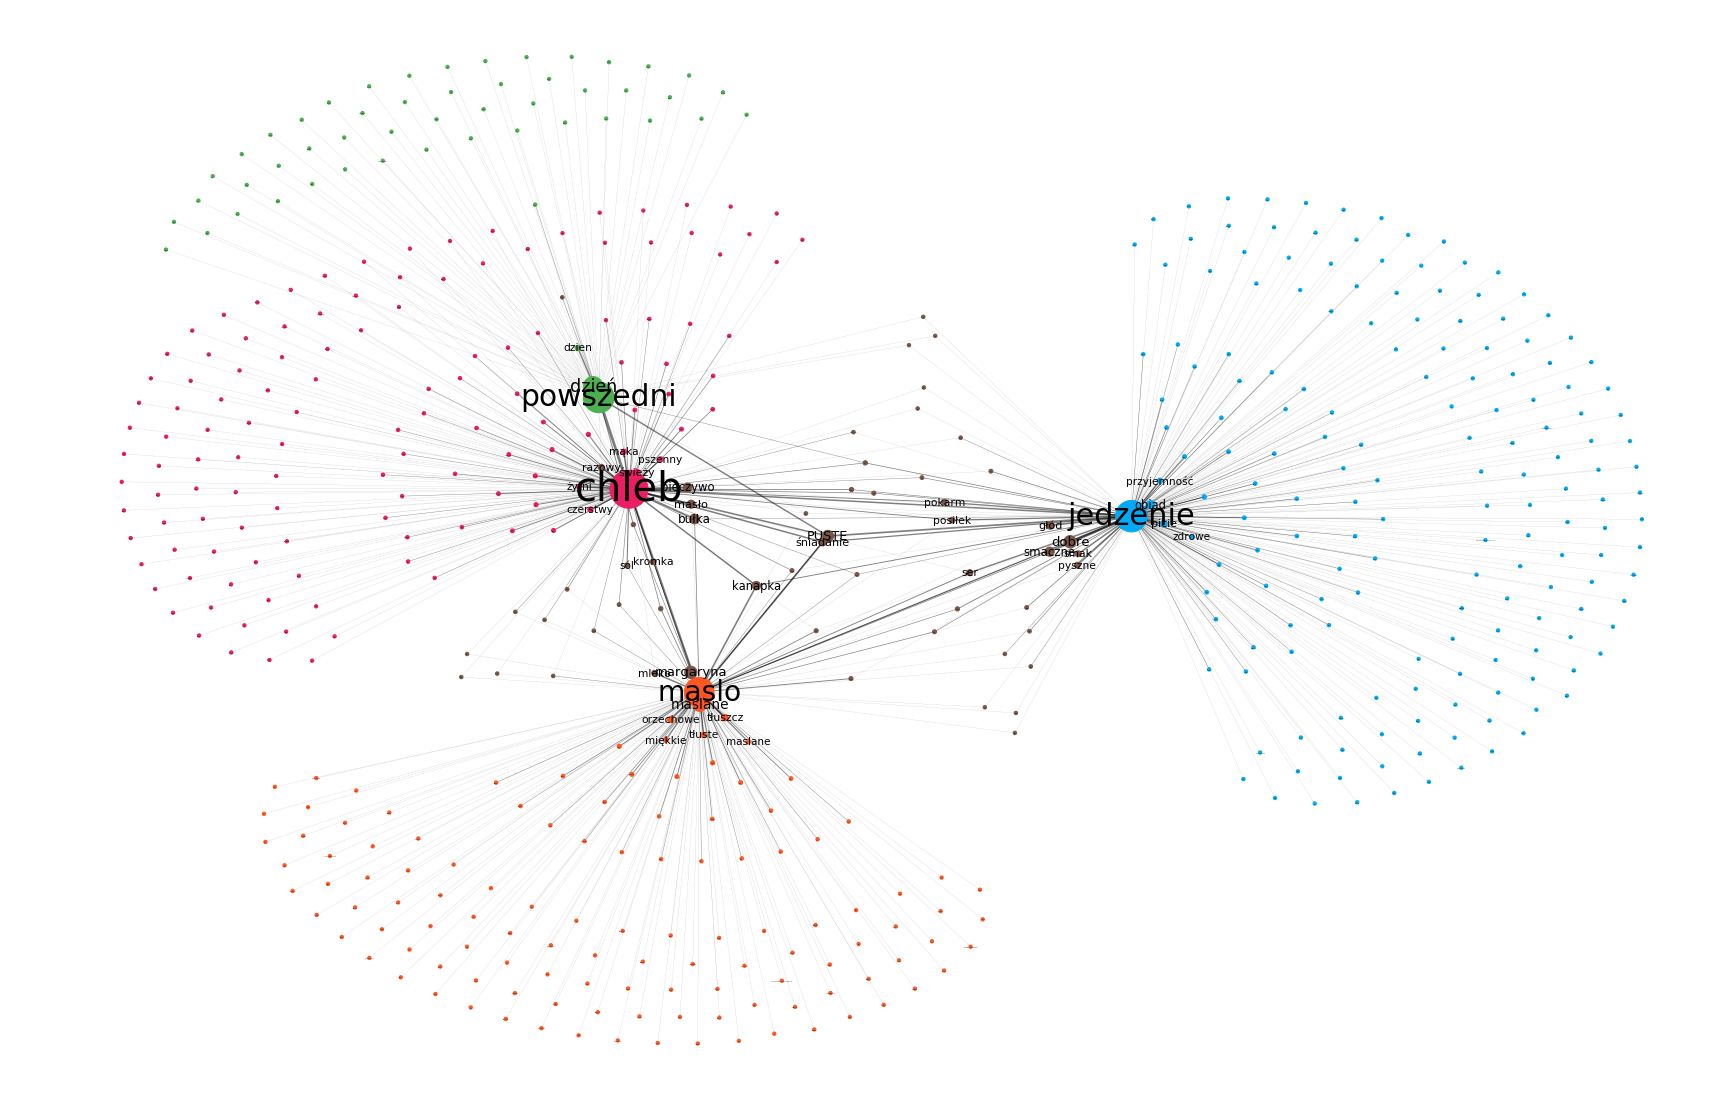

In [3]:
def draw(G, pos):
    plt.figure (figsize=(30, 20))

    nx.draw_networkx_nodes(
        G, 
        pos,
        node_size=[G.node[n]["size"] for n in G.nodes],
        node_color=[G.node[n]["color"] for n in G.nodes],
    )

    edges = G.edges()

    weights = [G[u][v]['weight'] for u,v in edges]
    max_weight = max(weights)
    weights = [0.1 + log10(w) for w in weights]


    font_size = [G.node[n]["size"] for n in G.nodes]
    max_node_size = max(font_size)
    font_size = [((10 + 30 * s/max_node_size) if s > 20 else 0)for s in font_size]

    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5)

    for i, p in enumerate(pos):
        nx.draw_networkx_labels(G, {p: pos[p]}, labels={p: p}, font_size=font_size[i])

    plt.axis('off')
    plt.show()
    

draw(G, pos)

In [4]:
for mw in main_words:
    
    paths = nx.single_source_dijkstra_path_length(G, mw, weight="cost")
    print(mw)
    for x in sorted([(v, k) for k, v in paths.items()], reverse=True)[:10]:
        print(f"\t{x}")

chleb
	(1.9701149425287356, 'żwawy')
	(1.9701149425287356, 'świeżość')
	(1.9701149425287356, 'śmieciowe')
	(1.9701149425287356, 'złe')
	(1.9701149425287356, 'zmaczne')
	(1.9701149425287356, 'zladłbym')
	(1.9701149425287356, 'zimne')
	(1.9701149425287356, 'ziemniaki')
	(1.9701149425287356, 'zabawa')
	(1.9701149425287356, 'wykwintne')
jedzenie
	(2.4929538655329866, 'żywot')
	(2.4929538655329866, 'wtorek')
	(2.4929538655329866, 'vhleb')
	(2.4929538655329866, 'vhel')
	(2.4929538655329866, 'typowy')
	(2.4929538655329866, 'tygodnik')
	(2.4929538655329866, 'tydzień')
	(2.4929538655329866, 'sąd')
	(2.4929538655329866, 'strój')
	(2.4929538655329866, 's')
powszedni
	(2.492945992757046, 'żwawy')
	(2.492945992757046, 'świeżość')
	(2.492945992757046, 'śmieciowe')
	(2.492945992757046, 'złe')
	(2.492945992757046, 'zmaczne')
	(2.492945992757046, 'zladłbym')
	(2.492945992757046, 'zimne')
	(2.492945992757046, 'ziemniaki')
	(2.492945992757046, 'zabawa')
	(2.492945992757046, 'wykwintne')
maslo
	(2.3990043

In [5]:
x = nx.betweenness_centrality(G, normalized=True, weight="cost")
print("betweenness_centrality")
for y in sorted([(v, k) for k, v in x.items()], reverse=True)[:10]:
    print(f"\t{y}")

betweenness_centrality
	(0.5847153004525405, 'chleb')
	(0.5504668614309446, 'jedzenie')
	(0.4235550209085181, 'maslo')
	(0.18786160279544023, 'powszedni')
	(0.0, 'żółty')
	(0.0, 'żółte')
	(0.0, 'żólte')
	(0.0, 'żywot')
	(0.0, 'żywność')
	(0.0, 'żyto')


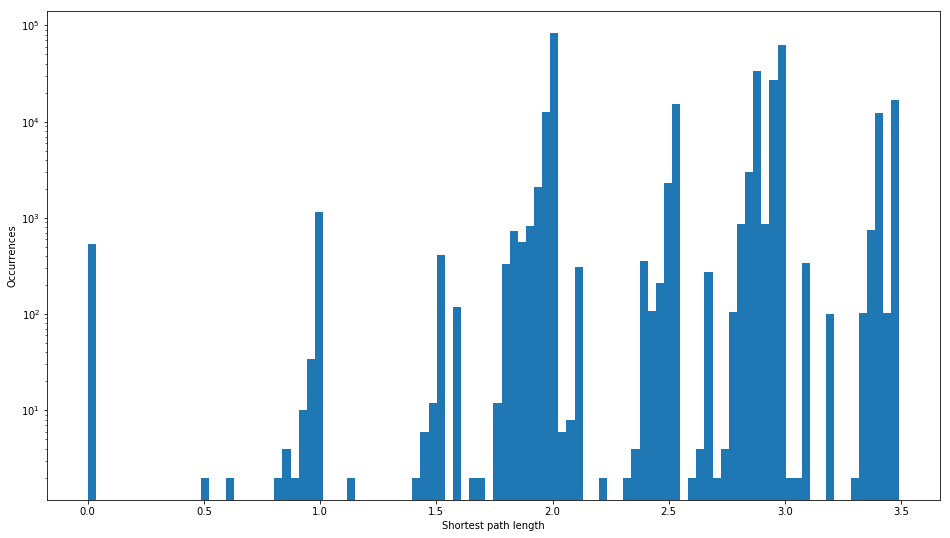

In [6]:
lenghts=[]

for w in nx.all_pairs_dijkstra_path_length(G, weight="cost"):
    lenghts.extend([v for k, v in w[1].items()])

    
plt.figure(figsize=(16, 9))
plt.hist(lenghts, bins=100) 
plt.gca().set_yscale("log")
plt.xlabel("Shortest path length")
plt.ylabel("Occurrences")

plt.show()


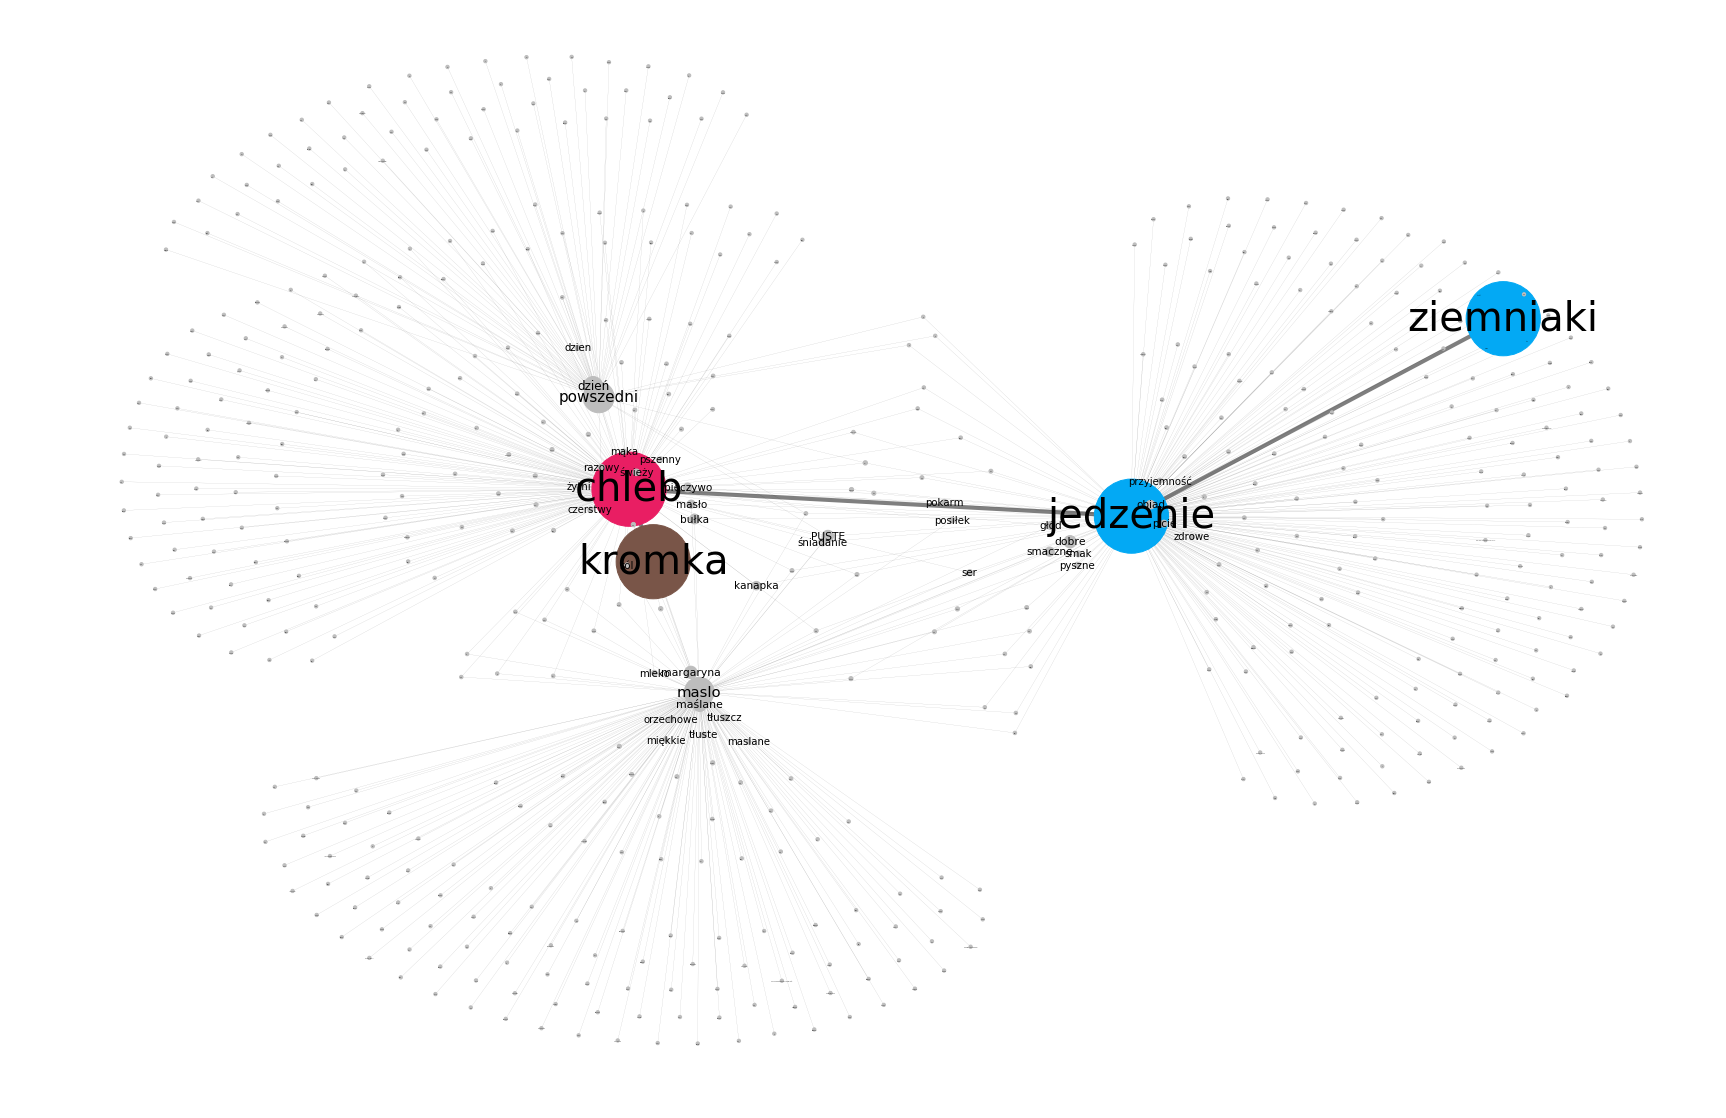

In [7]:
source="ziemniaki"
target="kromka"

cG = G.copy()
path = nx.dijkstra_path(cG, source, target, weight="cost")
for n in path:
    cG.node[n]["size"] = 5500

for b, e in cG.edges():
    cG[b][e]["weight"] = 1

for n in cG.nodes():
    if n in path:
        continue
        
    cG.nodes()[n]["color"] = "#bdbdbd"
    
for b, e in zip(path, path[1:]):
    cG[b][e]["weight"] = 10000
    
    
draw(cG, pos)    